In [1]:
from glob import glob
import pickle

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
file_list = glob('data6/*')

In [4]:
all_data_dicts = {
    'S':[],
    'M':[],
    'L':[],
    'X':[]
}

for filename in file_list:
    with open(filename, 'rb') as handle:
        this_dict = pickle.load(handle)
        this_dict['t']=int(filename[-8])
        all_data_dicts[filename[12]].append(this_dict)




In [5]:
all_data_dicts

{'S': [{'sig_ratio': 0.055, 'dimension': 1, 'result': [[1, 0]], 't': 5},
  {'sig_ratio': 0.065, 'dimension': 1, 'result': [[1, 2]], 't': 6},
  {'sig_ratio': 0.1, 'dimension': 18, 'result': [[18, 0]], 't': 6},
  {'sig_ratio': 0.045, 'dimension': 10, 'result': [[10, 1]], 't': 1},
  {'sig_ratio': 0.005, 'dimension': 1, 'result': [[1, 2]], 't': 0},
  {'sig_ratio': 0.035, 'dimension': 1, 'result': [[1, 0]], 't': 3},
  {'sig_ratio': 0.075, 'dimension': 14, 'result': [[14, 0]], 't': 1},
  {'sig_ratio': 0.07, 'dimension': 40, 'result': [[40, 1]], 't': 7},
  {'sig_ratio': 0.085, 'dimension': 4, 'result': [[4, 0]], 't': 5},
  {'sig_ratio': 0.075, 'dimension': 30, 'result': [[30, 0]], 't': 7},
  {'sig_ratio': 0.06, 'dimension': 8, 'result': [[8, -1]], 't': 8},
  {'sig_ratio': 0.07, 'dimension': 1, 'result': [[1, 0]], 't': 5},
  {'sig_ratio': 0.085, 'dimension': 18, 'result': [[18, 1]], 't': 7},
  {'sig_ratio': 0.075, 'dimension': 8, 'result': [[8, 0]], 't': 1},
  {'sig_ratio': 0.075, 'dimension':

In [6]:
def make_dict(key):
    numbers_S = {}

    for event in all_data_dicts[key]:
        sig_ratio, dim, t = event['sig_ratio'], event['dimension'], event['t']
        if sig_ratio not in numbers_S:
            numbers_S[sig_ratio] = [0 for _ in range(10)]
        numbers_S[sig_ratio][t] = max(dim, numbers_S[sig_ratio][t])
        
    out = {key:sum(val)/10 for key, val in numbers_S.items()}
    return out



In [7]:
numbers_S = make_dict('S')

In [8]:
numbers_M = make_dict('M')
numbers_L = make_dict('L')
numbers_XL = make_dict('X')

In [9]:
def sort_dict(d):
    return dict(sorted(d.items()))

In [10]:
numbers_S = sort_dict(numbers_S)
numbers_M = sort_dict(numbers_M)
numbers_L = sort_dict(numbers_L)
numbers_XL = sort_dict(numbers_XL)

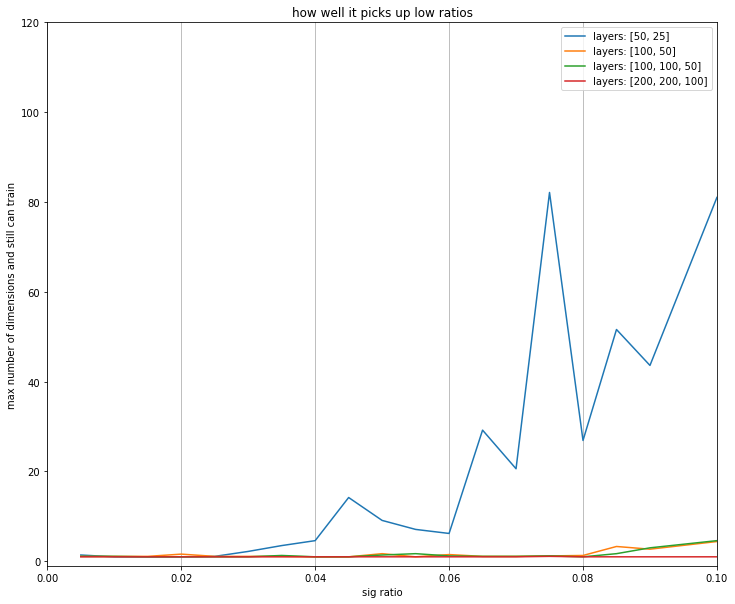

In [11]:
    
fig, ax = plt.subplots(figsize = (12,10))

ax.plot(numbers_S.keys(), numbers_S.values(),label = 'layers: [50, 25]')
ax.plot(numbers_M.keys(), numbers_M.values(),label = 'layers: [100, 50]')
ax.plot(numbers_L.keys(), numbers_L.values(),label = 'layers: [100, 100, 50]')

ax.plot(numbers_XL.keys(), numbers_XL.values(),label = 'layers: [200, 200, 100]')


ax.legend()

ax.set_title('how well it picks up low ratios')
ax.set_xlabel('sig ratio')

ax.set_ylabel('max number of dimensions and still can train')
ax.set_xlim((0,0.1))
ax.set_ylim((-1, 120))
ax.grid(axis="x", which = 'both')

plt.show()

In [12]:
export = {
    'S':numbers_S,
    'M':numbers_M,
    'L':numbers_L,
    'XL':numbers_XL
}

In [13]:
export

{'S': {0.005: 1.4,
  0.01: 1.0,
  0.015: 1.0,
  0.02: 1.0,
  0.025: 1.1,
  0.03: 2.2,
  0.035: 3.5,
  0.04: 4.6,
  0.045: 14.2,
  0.05: 9.1,
  0.055: 7.1,
  0.06: 6.2,
  0.065: 29.2,
  0.07: 20.6,
  0.075: 82.1,
  0.08: 26.9,
  0.085: 51.6,
  0.09: 43.6,
  0.1: 81.0},
 'M': {0.005: 1.1,
  0.01: 1.1,
  0.015: 1.1,
  0.02: 1.6,
  0.025: 1.1,
  0.03: 1.1,
  0.035: 1.1,
  0.04: 1.0,
  0.045: 1.0,
  0.05: 1.7,
  0.055: 1.0,
  0.06: 1.5,
  0.065: 1.1,
  0.07: 1.1,
  0.075: 1.2,
  0.08: 1.3,
  0.085: 3.3,
  0.09: 2.7,
  0.1: 4.4},
 'L': {0.005: 1.1,
  0.01: 1.1,
  0.015: 1.0,
  0.02: 1.0,
  0.025: 1.0,
  0.03: 1.0,
  0.035: 1.3,
  0.04: 1.0,
  0.045: 1.0,
  0.05: 1.4,
  0.055: 1.7,
  0.06: 1.2,
  0.065: 1.1,
  0.07: 1.1,
  0.075: 1.2,
  0.08: 1.0,
  0.085: 1.7,
  0.09: 3.0,
  0.1: 4.6},
 'XL': {0.005: 1.0,
  0.01: 1.0,
  0.015: 1.0,
  0.02: 1.0,
  0.025: 1.0,
  0.03: 1.0,
  0.035: 1.0,
  0.04: 1.0,
  0.045: 1.0,
  0.05: 1.0,
  0.055: 1.0,
  0.06: 1.0,
  0.065: 1.0,
  0.07: 1.0,
  0.075: 1.1,


In [14]:
with open('data_export/main_no_box/res6.pickle', 'wb') as handle:
    pickle.dump(export, handle, protocol=pickle.HIGHEST_PROTOCOL)
